# Lets look at one day's data

## Taxi availability over the period of a day

Every location has a varying taxi availability over the period of the day - there might be more taxis early in the morning when the drivers start, then during school and office hours, the taxis group in the city and central areas as people get to work, and in the evening the taxis again group in the popular areas, eventually all ending up in areas where the drivers live or have a shift change.

So we expect a very polynomial kind of change in the taxi pattterns for any location. Lets check one location and see how it looks.

In [1]:
from sgtaxidata import *
DBNAME="../taxis.db"
DATE="20170626"

In [2]:
lat1,lon1 = utils.get_lat_long("Sengkang")#a suburb
lat2,lon2 = utils.get_lat_long("Bugis")#city center

In [3]:
df1=taxis.getdf_loc_date(DBNAME,DATE,lat1,lon1)
df2=taxis.getdf_loc_date(DBNAME,DATE,lat2,lon2)

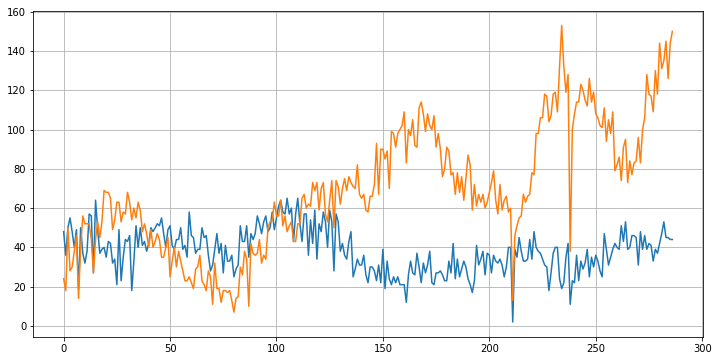

In [4]:
x1=df1['Point'].tolist()
y1=df1['TaxiCount'].tolist()
x2=df2['Point'].tolist()
y2=df2['TaxiCount'].tolist()

visualize.plot_data([(x1,y1),(x2,y2)])

The above plot proves what we expected. The blue line is for the first set of data, a suburb, and follows a steady pattern through out the day. The orange color line is for a busy market and night life area. As you can see the availability shoots up dramatically towards the end of the day. This is in line with what we would expect.

# Lets see a histogram

A histogram is a good way to approximate the probability of any one count of taxis for the location. We can determine whether a location is likely to have more of a hig count or more of a low count or maybe somewhere in between.

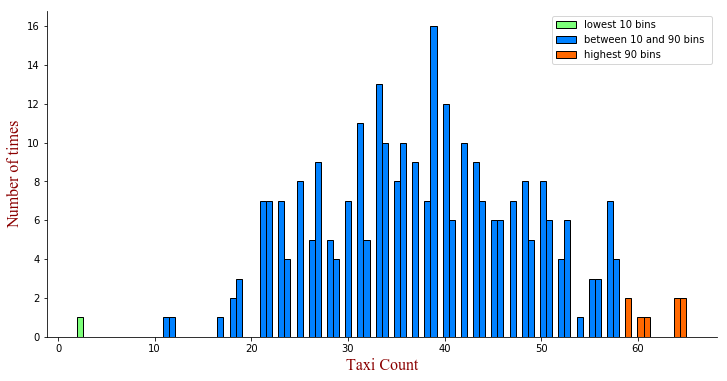

In [5]:
visualize.plot_hist(y1,'Taxi Count','Number of times')

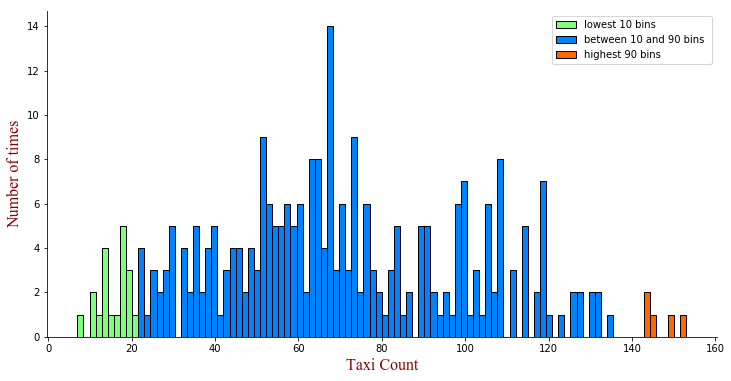

In [6]:
visualize.plot_hist(y2,'Taxi Count','Number of times')

# The extremes are not the most common values

We can explore the above steps with other locations, but we will notice that for any location the lower and higher extremes do no occur as often as the middle ground values. A location might have a higher number of taxis all day on an average, but still it will not have many occasions of even more large values, many occasions of falling way below that average high value.

The above histograms where drawn with 100 bins and the top 10 and lowest 10 bins were considered extremes.

Going forward we will use the same logic and ignore values that are above the 0.9 quantile and below the 0.1 quantile

# Some more stats

Lets see some more stats about this data. We can easily get them from the pandas data frame.

In [11]:
df1.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Point,X,Y,TaxiCount
count,287.000000,287.0,287.0,287.000000
mean,143.000000,24.0,12.0,38.177700
std,82.993976,0.0,0.0,11.153716
min,0.000000,24.0,12.0,2.000000
10%,28.600000,24.0,12.0,23.000000
25%,71.500000,24.0,12.0,30.500000
50%,143.000000,24.0,12.0,38.000000
75%,214.500000,24.0,12.0,46.000000
90%,257.400000,24.0,12.0,53.000000
max,286.000000,24.0,12.0,65.000000


From the above we can see that the taxi count for the first location hovers around 38 on average.

The 0.1 and 0.9 quantile also match pretty well with the above histogram.

# Confidence interval

Lets check some confidence interval values for this data.

If you are not familar with confidence intervals, the n% confidence interval is the range of values where we expect the values to be if we took this sample again. 

In our case, this will give us a good idea of where the predicted values will be.

In [13]:
import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    #sem is the standard mean error
    m, se = np.mean(a), scipy.stats.sem(a)
    #t-stat and percentage population func (inverse of cdf)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [18]:
#95% confidence interval
print mean_confidence_interval(df1['TaxiCount'].tolist())
#75% confidence interval
print mean_confidence_interval(df1['TaxiCount'].tolist(),confidence=0.75)
#50% confidence interval
print mean_confidence_interval(df1['TaxiCount'].tolist(),confidence=0.5)

(38.177700348432055, 36.881809483410137, 39.473591213453972)
(38.177700348432055, 37.418788551639068, 38.936612145225041)
(38.177700348432055, 37.733062337079311, 38.622338359784798)


In [19]:
#95% confidence interval
print mean_confidence_interval(df2['TaxiCount'].tolist())
#75% confidence interval
print mean_confidence_interval(df2['TaxiCount'].tolist(),confidence=0.75)
#50% confidence interval
print mean_confidence_interval(df2['TaxiCount'].tolist(),confidence=0.5)

(69.097560975609753, 65.397484417336287, 72.797637533883218)
(69.097560975609753, 66.930687340719643, 71.264434610499862)
(69.097560975609753, 67.828013726585979, 70.367108224633526)


When you talk about confidence that a value will fall in a range, you would expect that as the range of values narrows, you will feel less confident, because there can be other unknown variables at play.

You can see above we can only be 50% confident that it will in a narrow range, while 95% confident that it will be in a wider range.